In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations

In [11]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/Clustered_final/Processed/Processed_Narcos.csv")
df['Speaker'] = df['Speaker'].astype(str)
df['Speaker'] = df['Speaker'].apply(lambda x: "SPEAKER_" + x if len(x) == 2 else "SPEAKER_0" + x)

In [12]:
# Selecting only third season due to character changes
df = df.loc[12697:]
df

,Cumulative_shifted,Episode_order,Season,Episode,Correct_start,Correct_stop,Speaker
12697,43488.5,301,3,1,1.471563,1.910312,SPEAKER_04
12698,43488.5,301,3,1,3.007187,5.589063,SPEAKER_04
12699,43488.5,301,3,1,9.942812,11.967812,SPEAKER_00
12700,43488.5,301,3,1,15.224687,17.097812,SPEAKER_00
12701,43488.5,301,3,1,19.561562,20.000313,SPEAKER_00
...,...,...,...,...,...,...,...
19162,40446.5,310,3,10,2973.440313,2975.499062,SPEAKER_00
19163,40446.5,310,3,10,2975.499062,2980.949687,SPEAKER_25
19164,40446.5,310,3,10,2980.949687,2989.505312,SPEAKER_00
19165,40446.5,310,3,10,2989.505312,2990.146562,SPEAKER_19


In [13]:
def name_all(df):
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_00", "Gustavo/Jorge")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_01", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_02", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_03", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_04", "Amado")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_05", "Javier")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_06", "Jorge")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_07", "Maria/Paola")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_08", "Miguel_Rodriguez")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_09", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_10", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_11", "Pacho")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_12", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_13", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_14", "Carlo/David")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_15", "Feistl/Gustavo")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_16", "Van_Ness")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_17", "Narrator")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_18", "Gilberto_Rodriguez")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_19", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_20", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_21", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_22", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_23", "Bill_Stetchner")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_24", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_25", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_26", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_27", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_28", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_29", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_30", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_31", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_32", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_33", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_34", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_35", "")
  return df

df2 = name_all(df)
speaker_list = df2['Speaker'].tolist()

In [14]:
G = nx.Graph()

si, ei = 0, 2 #start index, end index
while ei < len(speaker_list):
    interaction = []
    for character in set(speaker_list[si : ei]):
        if ' ' in character:
            interaction.extend(character.split())
        else:
            interaction.append(character)
    interaction = set(interaction)
    if len(interaction) > 1:
        for sp1, sp2 in combinations(interaction, 2):
            if G.has_edge(sp1, sp2):
                G[sp1][sp2]['weight'] += 1
            else:
                G.add_edge(sp1, sp2, weight=1)
    si += 1
    ei += 1

In [15]:
print(G.nodes)
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
nx.write_gexf(G, '/home/ada/Documents/DTA/Thesis/Data/Networks/Narcos.gexf')
print('# interactions:', G.size(weight='weight'))

['Gustavo', 'Amado', 'Javier', 'SPEAKER_20', 'SPEAKER_19', 'Bill_Stetchner', 'Narrator', 'SPEAKER_02', 'SPEAKER_25', 'Feistl/Gustavo', 'SPEAKER_03', 'Jorge', 'SPEAKER_12', 'Maria/Paola', 'Miguel_Rodriguez', 'Gilberto_Rodriguez', 'SPEAKER_24', 'Carlo/David', 'Pacho', 'SPEAKER_10', 'SPEAKER_13', 'SPEAKER_01', 'Van_Ness', 'SPEAKER_09', 'SPEAKER_21', 'SPEAKER_22']
# nodes = 26, # edges = 275
# interactions: 3454.0


In [16]:
from copy import deepcopy

print('Before:')
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
print('# interactions:', G.size(weight='weight'))


Before:
# nodes = 26, # edges = 275
# interactions: 3454.0


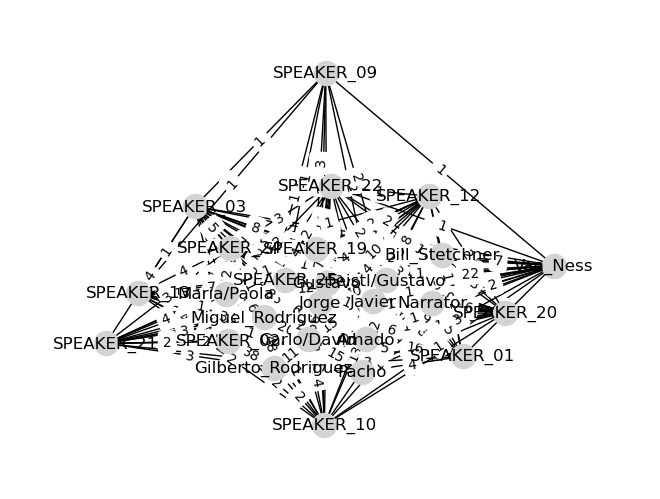

In [17]:
import matplotlib.pyplot as plt
from matplotlib.figure import _AxesStack

pos = nx.spring_layout(G, scale=2)
nx.draw(G, pos, node_color='lightgrey')
nx.draw_networkx_labels(G, pos);
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'weight'));

# take care of margins
plot_margin = 0.25
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin, x1 + plot_margin,
          y0 - plot_margin, y1 + plot_margin))
plt.axis('off');

In [23]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,Gustavo,Amado,60
1,Gustavo,Javier,68
2,Gustavo,Feistl/Gustavo,46
3,Gustavo,SPEAKER_19,90
4,Gustavo,SPEAKER_25,180
...,...,...,...
270,SPEAKER_13,SPEAKER_01,2
271,SPEAKER_01,Van_Ness,5
272,SPEAKER_01,SPEAKER_22,3
273,Van_Ness,SPEAKER_09,1


In [18]:
unweighted = G.degree()
weighted = G.degree(weight='weight')
bcent = nx.betweenness_centrality(G)
bcent

print(weighted)
print(unweighted)

[('Gustavo', 966), ('Amado', 343), ('Javier', 572), ('SPEAKER_20', 110), ('SPEAKER_19', 341), ('Bill_Stetchner', 220), ('Narrator', 328), ('SPEAKER_02', 244), ('SPEAKER_25', 582), ('Feistl/Gustavo', 514), ('SPEAKER_03', 82), ('Jorge', 520), ('SPEAKER_12', 70), ('Maria/Paola', 262), ('Miguel_Rodriguez', 330), ('Gilberto_Rodriguez', 268), ('SPEAKER_24', 142), ('Carlo/David', 304), ('Pacho', 198), ('SPEAKER_10', 62), ('SPEAKER_13', 94), ('SPEAKER_01', 132), ('Van_Ness', 76), ('SPEAKER_09', 16), ('SPEAKER_21', 68), ('SPEAKER_22', 64)]
[('Gustavo', 25), ('Amado', 21), ('Javier', 25), ('SPEAKER_20', 20), ('SPEAKER_19', 24), ('Bill_Stetchner', 22), ('Narrator', 21), ('SPEAKER_02', 24), ('SPEAKER_25', 25), ('Feistl/Gustavo', 25), ('SPEAKER_03', 21), ('Jorge', 25), ('SPEAKER_12', 16), ('Maria/Paola', 23), ('Miguel_Rodriguez', 25), ('Gilberto_Rodriguez', 22), ('SPEAKER_24', 22), ('Carlo/David', 24), ('Pacho', 21), ('SPEAKER_10', 17), ('SPEAKER_13', 19), ('SPEAKER_01', 19), ('Van_Ness', 21), ('SP

In [20]:
pairs = dict(nx.all_pairs_shortest_path_length(G))
pairs

{'Gustavo': {'Gustavo': 0,
  'SPEAKER_22': 1,
  'SPEAKER_03': 1,
  'Gilberto_Rodriguez': 1,
  'Amado': 1,
  'SPEAKER_25': 1,
  'Carlo/David': 1,
  'SPEAKER_10': 1,
  'SPEAKER_09': 1,
  'Jorge': 1,
  'SPEAKER_20': 1,
  'SPEAKER_12': 1,
  'SPEAKER_21': 1,
  'Miguel_Rodriguez': 1,
  'SPEAKER_24': 1,
  'SPEAKER_13': 1,
  'Pacho': 1,
  'Feistl/Gustavo': 1,
  'SPEAKER_02': 1,
  'SPEAKER_01': 1,
  'Javier': 1,
  'Bill_Stetchner': 1,
  'Van_Ness': 1,
  'Narrator': 1,
  'Maria/Paola': 1,
  'SPEAKER_19': 1},
 'Amado': {'Amado': 0,
  'SPEAKER_22': 1,
  'Gilberto_Rodriguez': 1,
  'SPEAKER_25': 1,
  'Carlo/David': 1,
  'Jorge': 1,
  'SPEAKER_20': 1,
  'SPEAKER_21': 1,
  'Miguel_Rodriguez': 1,
  'SPEAKER_24': 1,
  'SPEAKER_13': 1,
  'Pacho': 1,
  'Feistl/Gustavo': 1,
  'SPEAKER_02': 1,
  'SPEAKER_01': 1,
  'Gustavo': 1,
  'Javier': 1,
  'Bill_Stetchner': 1,
  'Van_Ness': 1,
  'Narrator': 1,
  'Maria/Paola': 1,
  'SPEAKER_19': 1,
  'SPEAKER_03': 2,
  'SPEAKER_10': 2,
  'SPEAKER_09': 2,
  'SPEAKER_12'

In [21]:
import pandas as pd
data = []
for c in sorted(pairs.keys()):
    data.append([pairs[c][d] for d in sorted(pairs.keys())])
pd.DataFrame(data, index=sorted(pairs.keys()), columns=sorted(pairs.keys()))

,Amado,Bill_Stetchner,Carlo/David,Feistl/Gustavo,Gilberto_Rodriguez,Gustavo,Javier,Jorge,Maria/Paola,Miguel_Rodriguez,...,SPEAKER_10,SPEAKER_12,SPEAKER_13,SPEAKER_19,SPEAKER_20,SPEAKER_21,SPEAKER_22,SPEAKER_24,SPEAKER_25,Van_Ness
Amado,0,1,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
Bill_Stetchner,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,2,1,1
Carlo/David,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Feistl/Gustavo,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Gilberto_Rodriguez,1,1,1,1,0,1,1,1,1,1,...,1,2,1,1,1,1,2,1,1,1
Gustavo,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Javier,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Jorge,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Maria/Paola,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Miguel_Rodriguez,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [22]:
weighted = nx.betweenness_centrality(G)

data = [(c, weighted[c]) for c in G.nodes()]
pd.DataFrame(data, columns=('character', 'betweenness centrality'))

,character,betweenness centrality
0,Gustavo,0.013138
1,Amado,0.003742
2,Javier,0.013138
3,SPEAKER_20,0.003473
4,SPEAKER_19,0.011819
5,Bill_Stetchner,0.005419
6,Narrator,0.002487
7,SPEAKER_02,0.007671
8,SPEAKER_25,0.013138
9,Feistl/Gustavo,0.013138
